In [83]:
import pandas as pd
import keras 
import numpy as np
from keras.models import *
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [91]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test , y_test) = mnist.load_data()

x_test = x_test.reshape((-1,784))
x_train = x_train.reshape((-1,784))

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame (y_train)

x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

df_concat_1 = pd.concat([x_train, y_train], axis=1)
df_concat_2 = pd.concat([x_test, y_test], axis=1)
df_concat_1

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [94]:
for i in range (0,10):
  if (i not in [1,7] ):
    index = df_concat_1[df_concat_1.iloc[:,-1] == i ].index
    df_concat_1.drop(index, inplace = True)

In [96]:
for i in range (0,10):
  if (i not in [1, 7]):
    index = df_concat_2[df_concat_2.iloc[:,-1] == i ].index
    df_concat_2.drop(index, inplace = True)

In [97]:
df_concat_2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
9984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [98]:
y_train = df_concat_1.iloc[:,-1].values
x_train = df_concat_1.iloc[:,:784].values

y_test = df_concat_2.iloc[:,-1].values
x_test = df_concat_2.iloc[:,:784].values

In [99]:
# normlize the data
x_train = x_train/255
x_test  = x_test/255

In [102]:
model = Sequential()
model.add(Dense(10,input_shape=(784,), activation="softmax"))
model.compile(optimizer='sgd',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [103]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test,y_test)
)


Epoch 1/30
407/407 [==============================] - 1s 1ms/step - loss: 0.2406 - accuracy: 0.9587 - val_loss: 0.0858 - val_accuracy: 0.9792
Epoch 2/30
407/407 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9849 - val_loss: 0.0610 - val_accuracy: 0.9829
Epoch 3/30
407/407 [==============================] - 0s 976us/step - loss: 0.0526 - accuracy: 0.9877 - val_loss: 0.0515 - val_accuracy: 0.9834
Epoch 4/30
407/407 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9889 - val_loss: 0.0459 - val_accuracy: 0.9866
Epoch 5/30
407/407 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9902 - val_loss: 0.0422 - val_accuracy: 0.9884
Epoch 6/30
407/407 [==============================] - 0s 962us/step - loss: 0.0371 - accuracy: 0.9905 - val_loss: 0.0395 - val_accuracy: 0.9889
Epoch 7/30
407/407 [==============================] - 0s 1000us/step - loss: 0.0346 - accuracy: 0.9912 - val_loss: 0.0379 - val_accuracy: 0.9894

Text(0, 0.5, 'losses')

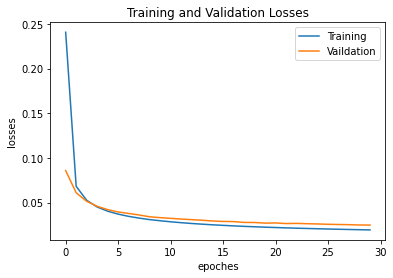

In [104]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

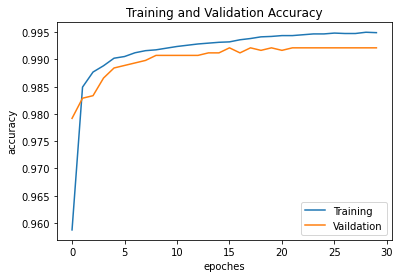

In [105]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')